### Stein's Paradoxを実装する
Stein's Paradox...不偏推定量じゃない推定量で平均二乗誤差がより小さい推定量が存在する。

In [1]:
import numpy as np; from tqdm import trange; import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from multiprocessing import Pool;import multiprocessing as multi

In [2]:
def sample(n_trial,y_true):
    '''
    sample generator
    '''
    norm=np.random.normal
    return np.hstack([norm(loc=y_true[0,0],size=(n_trial,1)),norm(loc=y_true[0,1],size=(n_trial,1)),norm(loc=y_true[0,2],size=(n_trial,1))])

def james_stein(X):
    '''
    parameters
    ----------
    X : np.ndarray. X.shape is (n_trial, 3).
    
    returns
    ----------
    theta_js : np.ndarray. james stein estimates. shape is (n_trial, 3)
    
    '''
    return (1-(1/(X**2).sum(axis=1,keepdims=True)))*X

def mse(y_true, y_pred):
    '''
    parameters
    ----------
    y_true : np.ndarray. shape is (1,3)
    y_pred : np.ndarray. shape is (n_trial,3)
    
    returns
    ----------
    mean squared error of each dimension
    (1次元目のmse, 2次元目の平均mse, 3次元目のmse)
    '''
    return ((y_true - y_pred)**2).mean(axis=0)

def js_mse(true, X):
    return mse(true,james_stein(X))

def ub_mse(true, X):
    return mse(true,X)

In [3]:
mu1=[i for i in range(-20,31)]

def _temp_for_multiprocess(arg):
    mu1,n_trial=arg
    print(mu1,end=' ',flush=True)
    np.random.seed(mu1+10000+np.random.randint(0,10000))
    true=np.array([[mu1,3,7]])
    X=sample(n_trial,true)
    return js_mse(true,X),ub_mse(true,X)

def get_result(n_trial):
    '''
    return
    ----------
    result_ub ... unbaised の mu1に対応する各次元の平均二乗誤差
    result_js ... james stein の mu1に対応する各次元の平均二乗誤差
    '''
    result_ub,result_js=[],[]
    args=[(i,n_trial) for i in mu1]
    #並列処理
    print('doing ',end=' ')
    p = Pool(multi.cpu_count()//2)
    result=p.map(_temp_for_multiprocess, args)
    p.close()
    print('done')
    
    result_ub=np.array([x[1] for x in result])
    result_js=np.array([x[0] for x in result])
    
    return result_ub, result_js

### n_trialを更にforで回し回数を稼ぐ

In [4]:
result_ub,result_js=[],[]
for i in trange(100):
    tmp_ub, tmp_js=get_result(10**8) #10**8ぐらいならギリギリメモリに乗る
    result_ub.append(tmp_ub)
    result_js.append(tmp_js)
result_js=np.array(result_js).mean(axis=0)
result_ub=np.array(result_ub).mean(axis=0)

  0%|          | 0/100 [00:00<?, ?it/s]

doing  -17 -20 -14 -11 -5 -8 -13 -4 -19 -7 -16 -10 -12 -3 -18 -15 -9 -6 -2 1 4 7 10 13 -1 8 5 2 11 14 0 9 3 6 15 12 16 19 22 25 28 17 23 20 26 29 18 24 21 30 27 

  1%|          | 1/100 [07:05<11:42:24, 425.70s/it]

done
doing  -20 -17 -11 -8 -14 -5 -10 -16 -19 -13 -7 -4 -9 -15 -12 -6 -3 -18 -2 1 4 7 10 13 2 -1 5 8 14 11 3 9 0 6 15 12 16 19 22 25 28 20 17 26 23 29 21 18 24 27 30 

  2%|▏         | 2/100 [12:36<10:17:30, 378.07s/it]

done
doing  -20 -17 -14 -8 -11 -5 -7 -16 -13 -19 -10 -4 -6 -3 -15 -12 -18 -9 -2 1 4 7 10 13 -1 2 5 8 11 14 0 6 3 12 9 15 16 19 22 25 28 20 23 17 26 29 21 24 27 18 30 

  3%|▎         | 3/100 [18:07<9:45:47, 362.34s/it] 

done
doing  -20 -17 -11 -14 -8 -5 -16 -13 -10 -4 -7 -19 -15 -9 -12 -6 -3 -18 -2 1 4 7 10 13 -1 2 5 14 8 11 0 3 15 6 9 12 16 19 22 25 28 17 20 29 26 23 21 18 24 27 30 

  4%|▍         | 4/100 [23:35<9:26:20, 353.97s/it]

done
doing  -17 -11 -20 -14 -8 -5 -16 -19 -4 -10 -13 -7 -9 -15 -18 -3 -6 -12 -2 1 4 7 10 13 2 5 -1 8 11 14 3 6 12 0 9 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

  5%|▌         | 5/100 [29:05<9:12:45, 349.11s/it]

done
doing  -20 -14 -17 -11 -8 -5 -7 -4 -16 -10 -19 -13 -15 -6 -3 -9 -12 -18 -2 1 4 7 10 13 -1 5 2 11 14 8 0 6 12 3 15 9 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

  6%|▌         | 6/100 [34:34<9:01:46, 345.81s/it]

done
doing  -17 -20 -14 -11 -8 -5 -13 -16 -4 -7 -19 -10 -12 -6 -15 -3 -18 -9 -2 1 4 7 10 13 -1 5 8 2 11 14 0 3 6 9 12 15 16 19 22 25 28 17 20 26 23 29 18 21 30 24 27 

  7%|▋         | 7/100 [40:02<8:51:56, 343.19s/it]

done
doing  -17 -20 -14 -11 -8 -5 -10 -4 -7 -13 -19 -16 -9 -18 -3 -6 -12 -15 -2 1 4 7 10 13 5 2 -1 11 14 8 6 12 0 3 9 15 16 19 22 25 28 20 17 23 26 29 18 27 30 21 24 

  8%|▊         | 8/100 [45:32<8:43:43, 341.56s/it]

done
doing  -17 -20 -14 -8 -11 -5 -4 -13 -10 -16 -19 -7 -3 -12 -6 -9 -15 -18 -2 1 4 7 10 13 -1 2 11 14 5 8 0 3 12 15 9 6 16 19 22 25 28 20 23 17 26 29 21 18 24 27 30 

  9%|▉         | 9/100 [51:01<8:35:59, 340.21s/it]

done
doing  -20 -17 -11 -5 -14 -8 -19 -13 -4 -10 -7 -16 -12 -3 -9 -18 -15 -6 -2 1 4 7 10 13 2 5 -1 8 14 11 3 0 9 6 15 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 10%|█         | 10/100 [56:31<8:28:41, 339.13s/it]

done
doing  -17 -20 -14 -11 -8 -5 -19 -7 -10 -13 -16 -4 -9 -6 -15 -18 -3 -12 -2 1 4 7 10 13 2 5 11 -1 8 14 3 6 12 0 9 15 16 19 22 25 28 20 17 23 26 29 24 21 18 27 30 

 11%|█         | 11/100 [1:02:02<8:21:55, 338.38s/it]

done
doing  -17 -14 -20 -11 -8 -5 -16 -19 -4 -10 -13 -7 -6 -3 -18 -9 -15 -12 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 9 6 12 15 16 19 22 25 28 17 20 23 29 26 18 24 21 27 30 

 12%|█▏        | 12/100 [1:07:31<8:15:09, 337.61s/it]

done
doing  -20 -17 -14 -11 -8 -5 -4 -13 -10 -19 -16 -7 -3 -18 -12 -9 -6 -15 -2 1 4 7 10 13 -1 5 2 8 11 14 0 6 9 3 12 15 16 19 22 25 28 20 26 17 23 29 21 18 27 24 30 

 13%|█▎        | 13/100 [1:12:59<8:08:26, 336.86s/it]

done
doing  -20 -17 -14 -5 -8 -11 -7 -10 -4 -13 -19 -16 -9 -6 -18 -15 -3 -12 -2 1 4 7 10 13 -1 2 8 5 11 14 3 0 9 12 6 15 16 19 22 25 28 20 17 23 26 29 18 24 21 27 30 

 14%|█▍        | 14/100 [1:18:28<8:02:01, 336.30s/it]

done
doing  -17 -20 -11 -5 -8 -14 -19 -13 -10 -7 -16 -4 -12 -6 -9 -15 -18 -3 -2 1 4 7 10 13 -1 2 5 11 8 14 0 3 6 12 9 15 16 19 22 25 28 17 26 23 29 20 18 27 24 30 21 

 15%|█▌        | 15/100 [1:23:58<7:55:52, 335.91s/it]

done
doing  -20 -17 -14 -8 -11 -5 -10 -19 -16 -4 -13 -7 -9 -18 -3 -6 -15 -12 -2 1 4 7 10 13 -1 2 5 14 11 8 0 3 15 6 12 9 16 19 22 25 28 17 26 20 23 29 18 30 27 21 24 

 16%|█▌        | 16/100 [1:29:29<7:49:51, 335.61s/it]

done
doing  -17 -20 -14 -11 -8 -5 -19 -4 -10 -16 -7 -13 -18 -12 -6 -3 -9 -15 -2 1 4 7 10 13 -1 2 5 8 14 11 3 0 6 9 12 15 16 19 22 25 28 20 17 26 23 29 21 18 27 30 24 

 17%|█▋        | 17/100 [1:34:58<7:43:39, 335.18s/it]

done
doing  -20 -14 -17 -11 -8 -5 -7 -4 -13 -19 -10 -16 -6 -3 -12 -18 -15 -9 -2 1 4 7 10 13 2 -1 5 8 14 11 0 3 9 6 15 12 16 19 22 25 28 20 17 26 23 29 21 18 27 24 30 

 18%|█▊        | 18/100 [1:40:26<7:37:31, 334.78s/it]

done
doing  -20 -11 -17 -14 -8 -5 -4 -13 -10 -16 -7 -19 -3 -15 -12 -9 -18 -6 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 12 9 15 16 19 22 25 28 17 20 29 26 23 18 27 30 21 24 

 19%|█▉        | 19/100 [1:45:54<7:31:30, 334.45s/it]

done
doing  -20 -17 -14 -8 -11 -5 -4 -7 -10 -16 -13 -19 -6 -15 -3 -9 -12 -18 -2 1 4 7 10 13 -1 5 2 8 11 14 0 6 3 12 15 9 16 19 22 25 28 17 20 26 23 29 18 21 27 24 30 

 20%|██        | 20/100 [1:51:25<7:25:40, 334.26s/it]

done
doing  -20 -17 -8 -11 -14 -5 -16 -19 -10 -13 -7 -4 -15 -9 -18 -12 -3 -6 -2 1 4 7 10 13 2 -1 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 17 20 23 29 26 18 21 30 24 27 

 21%|██        | 21/100 [1:56:55<7:19:53, 334.09s/it]

done
doing  -20 -17 -5 -8 -11 -14 -7 -10 -16 -19 -4 -13 -15 -9 -6 -18 -12 -3 -2 1 4 7 10 13 2 -1 5 8 11 14 0 3 6 12 15 9 16 19 22 25 28 20 23 17 29 26 21 24 18 30 27 

 22%|██▏       | 22/100 [2:02:26<7:14:08, 333.95s/it]

done
doing  -20 -14 -17 -11 -8 -5 -19 -16 -7 -13 -4 -10 -18 -12 -15 -3 -6 -9 -2 1 4 7 10 13 2 -1 8 5 11 14 3 0 9 6 12 15 16 19 22 25 28 26 20 17 23 29 18 27 24 21 30 

 23%|██▎       | 23/100 [2:07:55<7:08:17, 333.73s/it]

done
doing  -17 -20 -14 -11 -8 -5 -10 -4 -7 -16 -19 -13 -9 -6 -3 -15 -12 -18 -2 1 4 7 10 13 -1 2 8 5 11 14 0 3 9 6 12 15 16 19 22 25 28 17 20 23 26 29 18 21 24 30 27 

 24%|██▍       | 24/100 [2:13:24<7:02:27, 333.52s/it]

done
doing  -20 -14 -11 -17 -8 -5 -19 -16 -13 -10 -4 -7 -18 -15 -12 -6 -3 -9 -2 1 4 7 10 13 -1 5 2 14 8 11 0 3 6 12 9 15 16 19 22 25 28 17 20 26 23 29 18 21 27 24 30 

 25%|██▌       | 25/100 [2:18:54<6:56:44, 333.39s/it]

done
doing  -20 -17 -14 -8 -11 -5 -13 -7 -10 -16 -19 -4 -12 -18 -15 -3 -6 -9 -2 1 4 7 10 13 -1 2 8 5 14 11 0 9 3 6 12 15 16 19 22 25 28 17 20 29 23 26 18 21 27 30 24 

 26%|██▌       | 26/100 [2:24:25<6:51:02, 333.28s/it]

done
doing  -20 -14 -17 -8 -11 -5 -16 -10 -13 -19 -7 -4 -12 -15 -9 -18 -3 -6 -2 1 4 7 10 13 5 -1 2 8 11 14 6 12 9 0 3 15 16 19 22 25 28 17 20 23 26 29 18 21 30 24 27 

 27%|██▋       | 27/100 [2:29:54<6:45:18, 333.13s/it]

done
doing  -20 -17 -14 -11 -8 -5 -7 -4 -10 -19 -16 -13 -6 -18 -3 -9 -12 -15 -2 1 4 7 10 13 -1 2 8 11 5 14 0 9 3 12 6 15 16 19 22 25 28 17 23 20 26 29 18 24 30 21 27 

 28%|██▊       | 28/100 [2:35:24<6:39:36, 333.00s/it]

done
doing  -20 -17 -14 -8 -11 -5 -10 -13 -19 -7 -16 -4 -12 -15 -18 -9 -6 -3 -2 1 4 7 10 13 -1 2 14 8 5 11 0 3 6 15 12 9 16 19 22 25 28 17 26 20 23 29 18 27 24 21 30 

 29%|██▉       | 29/100 [2:40:54<6:33:56, 332.90s/it]

done
doing  -20 -17 -14 -11 -8 -5 -16 -10 -7 -19 -13 -4 -6 -9 -18 -15 -12 -3 -2 1 4 7 10 13 -1 2 11 14 8 5 0 3 12 9 6 15 16 19 22 25 28 17 23 20 26 29 18 24 21 30 27 

 30%|███       | 30/100 [2:46:24<6:28:17, 332.82s/it]

done
doing  -20 -17 -11 -8 -14 -5 -19 -13 -10 -16 -7 -4 -12 -6 -18 -15 -9 -3 -2 1 4 7 10 13 8 2 -1 5 14 11 9 6 12 3 15 0 16 19 22 25 28 17 20 29 26 23 18 21 30 27 24 

 31%|███       | 31/100 [2:51:56<6:22:41, 332.78s/it]

done
doing  -20 -17 -14 -5 -11 -8 -13 -16 -7 -4 -19 -10 -12 -6 -15 -9 -18 -3 -2 1 4 7 10 13 2 -1 11 5 8 14 0 3 9 12 15 6 16 19 22 25 28 17 20 23 26 29 18 21 24 30 27 

 32%|███▏      | 32/100 [2:57:27<6:17:06, 332.75s/it]

done
doing  -17 -20 -11 -14 -5 -8 -13 -4 -16 -10 -7 -19 -15 -12 -3 -9 -6 -18 -2 1 4 7 10 13 5 2 -1 14 11 8 3 6 15 0 12 9 16 19 22 25 28 17 20 26 23 29 18 27 24 21 30 

 33%|███▎      | 33/100 [3:02:57<6:11:28, 332.67s/it]

done
doing  -20 -14 -17 -11 -5 -8 -7 -16 -4 -13 -19 -10 -3 -12 -9 -15 -6 -18 -2 1 4 7 10 13 -1 5 11 2 8 14 0 3 6 12 15 9 16 19 22 25 28 17 26 20 29 23 18 30 21 27 24 

 34%|███▍      | 34/100 [3:08:28<6:05:51, 332.59s/it]

done
doing  -20 -17 -14 -11 -8 -5 -19 -16 -4 -7 -10 -13 -15 -18 -3 -6 -9 -12 -2 1 4 7 10 13 -1 2 8 14 5 11 0 3 9 12 15 6 16 19 22 25 28 17 20 23 29 26 18 21 24 27 30 

 35%|███▌      | 35/100 [3:13:56<6:00:10, 332.47s/it]

done
doing  -20 -14 -17 -11 -8 -5 -10 -16 -4 -19 -13 -7 -15 -9 -6 -18 -3 -12 -2 1 4 7 10 13 -1 2 5 11 8 14 0 3 6 9 15 12 16 19 22 25 28 17 20 23 29 26 18 24 21 30 27 

 36%|███▌      | 36/100 [3:19:26<5:54:34, 332.41s/it]

done
doing  -20 -17 -14 -11 -8 -5 -4 -10 -13 -7 -16 -19 -3 -18 -9 -12 -6 -15 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 17 20 26 23 29 18 21 27 24 30 

 37%|███▋      | 37/100 [3:24:56<5:48:57, 332.33s/it]

done
doing  -20 -14 -17 -11 -8 -5 -19 -4 -7 -10 -13 -16 -18 -9 -15 -6 -3 -12 -2 1 4 7 10 13 -1 2 11 14 5 8 0 3 12 15 9 6 16 19 22 25 28 17 26 20 29 23 27 18 30 24 21 

 38%|███▊      | 38/100 [3:30:27<5:43:22, 332.30s/it]

done
doing  -20 -17 -11 -14 -5 -8 -13 -10 -19 -7 -16 -4 -12 -18 -9 -6 -15 -3 -2 1 4 7 10 13 -1 2 5 14 8 11 3 0 6 9 15 12 16 19 22 25 28 17 20 26 23 29 18 21 30 27 24 

 39%|███▉      | 39/100 [3:35:56<5:37:45, 332.22s/it]

done
doing  -14 -17 -20 -5 -11 -8 -10 -16 -4 -7 -13 -19 -9 -15 -3 -12 -18 -6 -2 1 4 7 10 13 -1 8 5 2 11 14 9 0 3 6 12 15 16 19 22 25 28 20 23 17 26 29 24 18 27 21 30 

 40%|████      | 40/100 [3:41:29<5:32:13, 332.23s/it]

done
doing  -20 -17 -14 -8 -5 -11 -16 -19 -4 -13 -7 -10 -15 -3 -12 -6 -18 -9 -2 1 4 7 10 13 2 5 -1 8 11 14 3 6 9 0 12 15 16 19 22 25 28 17 23 20 26 29 24 18 21 27 30 

 41%|████      | 41/100 [3:46:58<5:26:37, 332.17s/it]

done
doing  -17 -20 -11 -8 -14 -5 -10 -19 -7 -4 -16 -13 -9 -12 -3 -6 -15 -18 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 12 9 15 16 19 22 25 28 17 20 23 29 26 21 18 24 30 27 

 42%|████▏     | 42/100 [3:52:28<5:21:01, 332.10s/it]

done
doing  -20 -11 -14 -17 -8 -5 -4 -16 -13 -7 -10 -19 -15 -3 -6 -12 -18 -9 -2 1 4 7 10 13 -1 5 2 11 8 14 0 6 3 9 15 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 43%|████▎     | 43/100 [3:57:57<5:15:26, 332.05s/it]

done
doing  -14 -20 -17 -8 -11 -5 -16 -4 -19 -10 -13 -7 -15 -9 -3 -6 -12 -18 -2 1 4 7 10 13 -1 2 5 8 11 14 0 9 6 3 15 12 16 19 22 25 28 17 20 23 26 29 21 18 24 27 30 

 44%|████▍     | 44/100 [4:03:29<5:09:53, 332.02s/it]

done
doing  -17 -8 -14 -20 -11 -5 -10 -4 -16 -13 -7 -19 -9 -15 -3 -12 -18 -6 -2 1 4 7 10 13 5 2 -1 8 11 14 6 3 0 9 12 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 45%|████▌     | 45/100 [4:08:58<5:04:18, 331.97s/it]

done
doing  -14 -20 -17 -11 -8 -5 -7 -16 -4 -13 -19 -10 -6 -15 -12 -18 -3 -9 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 12 15 9 16 19 22 25 28 17 20 23 26 29 18 24 21 30 27 

 46%|████▌     | 46/100 [4:14:29<4:58:44, 331.94s/it]

done
doing  -20 -14 -17 -11 -8 -5 -13 -7 -10 -4 -19 -16 -3 -12 -9 -18 -6 -15 -2 1 4 7 10 13 2 5 -1 8 11 14 3 6 9 12 0 15 16 19 22 25 28 17 29 23 20 26 18 30 24 27 21 

 47%|████▋     | 47/100 [4:20:00<4:53:11, 331.92s/it]

done
doing  -20 -17 -14 -11 -8 -5 -10 -19 -13 -16 -7 -4 -9 -15 -6 -12 -18 -3 -2 1 4 7 10 13 -1 2 8 5 11 14 0 3 6 9 12 15 16 19 22 25 28 20 17 26 23 29 21 18 27 24 30 

 48%|████▊     | 48/100 [4:25:28<4:47:35, 331.84s/it]

done
doing  -20 -14 -17 -11 -5 -8 -10 -19 -16 -13 -7 -4 -9 -15 -18 -12 -6 -3 -2 1 4 7 10 13 -1 2 8 5 11 14 0 3 6 9 12 15 16 19 22 25 28 17 20 23 26 29 18 21 27 24 30 

 49%|████▉     | 49/100 [4:30:27<4:41:29, 331.17s/it]

done
doing  -14 -20 -17 -11 -8 -5 -19 -4 -13 -16 -10 -7 -12 -18 -15 -3 -6 -9 -2 1 4 7 10 13 2 -1 8 5 11 14 3 0 9 6 12 15 16 19 22 25 28 17 20 23 26 29 21 18 24 27 30 

 50%|█████     | 50/100 [4:35:13<4:35:13, 330.27s/it]

done
doing  -11 -20 -14 -17 -5 -8 -4 -7 -13 -19 -16 -10 -3 -18 -6 -12 -15 -9 -2 1 4 7 10 13 -1 2 8 5 14 11 0 3 6 12 9 15 16 19 22 25 28 17 20 23 26 29 18 21 24 30 27 

 51%|█████     | 51/100 [4:39:49<4:28:50, 329.20s/it]

done
doing  -20 -17 -14 -8 -11 -5 -7 -4 -16 -19 -10 -13 -6 -3 -12 -18 -15 -9 -2 1 4 7 10 13 2 -1 5 8 14 11 3 0 6 15 9 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 52%|█████▏    | 52/100 [4:44:19<4:22:26, 328.06s/it]

done
doing  -8 -17 -11 -14 -20 -5 -19 -7 -4 -13 -16 -10 -18 -6 -9 -15 -3 -12 -2 1 4 7 10 13 -1 2 5 8 14 11 0 3 6 12 9 15 16 19 22 25 28 17 20 23 29 26 24 21 18 30 27 

 53%|█████▎    | 53/100 [4:48:52<4:16:10, 327.02s/it]

done
doing  -14 -20 -11 -17 -8 -5 -4 -19 -7 -13 -16 -10 -3 -18 -6 -12 -9 -15 -2 1 4 7 10 13 -1 5 2 8 11 14 0 6 3 12 9 15 16 19 22 25 28 17 20 23 29 26 18 21 24 27 30 

 54%|█████▍    | 54/100 [4:53:23<4:09:55, 325.99s/it]

done
doing  -14 -11 -20 -5 -17 -8 -7 -10 -19 -16 -4 -13 -6 -12 -18 -15 -9 -3 -2 1 4 7 10 13 -1 2 8 5 14 11 0 3 6 9 15 12 16 19 22 25 28 17 20 26 23 29 18 21 24 27 30 

 55%|█████▌    | 55/100 [4:57:56<4:03:46, 325.02s/it]

done
doing  -20 -17 -8 -14 -11 -5 -4 -7 -10 -13 -19 -16 -9 -18 -3 -12 -15 -6 -2 1 4 7 10 13 -1 2 8 11 5 14 0 3 9 6 12 15 16 19 22 25 28 17 20 23 26 29 21 18 24 30 27 

 56%|█████▌    | 56/100 [5:02:32<3:57:42, 324.14s/it]

done
doing  -20 -8 -5 -11 -14 -17 -13 -16 -19 -7 -10 -4 -12 -18 -15 -3 -6 -9 -2 1 4 7 10 13 -1 2 5 8 14 11 0 3 9 6 12 15 16 19 22 25 28 17 20 23 26 29 21 18 24 27 30 

 57%|█████▋    | 57/100 [5:07:05<3:51:39, 323.25s/it]

done
doing  -20 -11 -14 -5 -17 -8 -16 -10 -4 -7 -13 -19 -15 -3 -9 -12 -6 -18 -2 1 4 7 10 13 -1 5 2 8 14 11 0 6 3 9 15 12 16 19 22 25 28 17 23 20 29 26 18 24 21 30 27 

 58%|█████▊    | 58/100 [5:11:38<3:45:40, 322.39s/it]

done
doing  -17 -11 -14 -8 -5 -20 -19 -4 -10 -7 -16 -13 -18 -3 -9 -12 -15 -6 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 20 17 23 29 26 21 18 24 30 27 

 59%|█████▉    | 59/100 [5:16:11<3:39:43, 321.55s/it]

done
doing  -20 -8 -17 -5 -14 -11 -10 -4 -19 -13 -16 -7 -9 -3 -18 -15 -12 -6 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 17 23 20 26 29 18 24 21 27 30 

 60%|██████    | 60/100 [5:20:43<3:33:48, 320.72s/it]

done
doing  -20 -14 -11 -17 -8 -5 -4 -16 -10 -7 -13 -19 -3 -15 -6 -12 -9 -18 -2 1 4 7 10 13 -1 2 5 8 11 14 0 6 3 9 15 12 16 19 22 25 28 20 23 17 26 29 21 18 24 27 30 

 61%|██████    | 61/100 [5:25:15<3:27:57, 319.93s/it]

done
doing  -20 -14 -8 -11 -17 -5 -4 -13 -16 -19 -10 -7 -3 -18 -15 -9 -12 -6 -2 1 4 7 10 13 -1 2 5 11 8 14 3 6 0 9 12 15 16 19 22 25 28 17 20 23 26 29 21 24 18 27 30 

 62%|██████▏   | 62/100 [5:29:48<3:22:08, 319.17s/it]

done
doing  -14 -20 -17 -11 -8 -5 -13 -19 -10 -7 -16 -4 -12 -9 -18 -3 -6 -15 -2 1 4 7 10 13 -1 2 5 11 8 14 0 3 6 12 9 15 16 19 22 25 28 17 20 23 29 26 18 21 24 30 27 

 63%|██████▎   | 63/100 [5:34:19<3:16:21, 318.41s/it]

done
doing  -20 -14 -17 -11 -5 -8 -13 -4 -16 -19 -10 -7 -12 -3 -18 -6 -9 -15 -2 1 4 7 10 13 -1 2 11 5 14 8 3 0 15 6 12 9 16 19 22 25 28 17 20 23 29 26 18 21 24 30 27 

 64%|██████▍   | 64/100 [5:38:52<3:10:36, 317.69s/it]

done
doing  -17 -20 -8 -14 -11 -5 -4 -10 -13 -19 -7 -16 -3 -9 -12 -15 -6 -18 -2 1 4 7 10 13 -1 2 5 8 14 11 0 3 6 9 15 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 65%|██████▌   | 65/100 [5:43:22<3:04:53, 316.96s/it]

done
doing  -17 -11 -20 -14 -8 -5 -19 -13 -7 -16 -4 -10 -18 -15 -6 -9 -12 -3 -2 1 4 7 10 13 -1 2 11 5 8 14 0 3 12 6 9 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 66%|██████▌   | 66/100 [5:47:54<2:59:13, 316.28s/it]

done
doing  -20 -14 -17 -11 -8 -5 -13 -16 -4 -10 -19 -7 -12 -9 -18 -6 -3 -15 -2 1 4 7 10 13 -1 2 5 8 11 14 3 0 6 9 12 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 67%|██████▋   | 67/100 [5:52:26<2:53:35, 315.62s/it]

done
doing  -17 -14 -11 -20 -5 -8 -13 -19 -7 -10 -4 -16 -12 -18 -9 -3 -6 -15 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 20 17 23 26 29 21 18 24 27 30 

 68%|██████▊   | 68/100 [5:56:57<2:47:58, 314.96s/it]

done
doing  -14 -8 -20 -11 -17 -5 -10 -16 -13 -7 -19 -4 -12 -9 -6 -15 -3 -18 -2 1 4 7 10 13 -1 2 11 5 8 14 0 3 6 12 9 15 16 19 22 25 28 17 20 23 29 26 18 21 24 30 27 

 69%|██████▉   | 69/100 [6:01:31<2:42:25, 314.37s/it]

done
doing  -17 -8 -14 -20 -11 -5 -4 -13 -7 -19 -16 -10 -3 -12 -18 -9 -15 -6 -2 1 4 7 10 13 -1 2 5 14 8 11 0 3 6 15 9 12 16 19 22 25 28 17 20 23 26 29 21 18 24 27 30 

 70%|███████   | 70/100 [6:06:03<2:36:52, 313.76s/it]

done
doing  -17 -20 -14 -11 -8 -5 -7 -4 -10 -16 -13 -19 -3 -12 -6 -9 -18 -15 -2 1 4 7 10 13 -1 2 5 14 11 8 0 3 6 12 9 15 16 19 22 25 28 20 17 23 26 29 21 24 18 27 30 

 71%|███████   | 71/100 [6:10:37<2:31:22, 313.20s/it]

done
doing  -17 -11 -8 -20 -14 -5 -7 -10 -13 -4 -16 -19 -9 -6 -12 -3 -18 -15 -2 1 4 7 10 13 2 5 -1 8 11 14 3 6 12 9 0 15 16 19 22 25 28 17 20 26 23 29 18 21 27 24 30 

 72%|███████▏  | 72/100 [6:15:09<2:25:53, 312.63s/it]

done
doing  -20 -17 -11 -14 -8 -5 -10 -19 -13 -16 -7 -4 -9 -18 -6 -12 -15 -3 -2 1 4 7 10 13 -1 2 5 8 11 14 3 0 6 9 15 12 16 19 22 25 28 17 23 20 26 29 18 21 27 24 30 

 73%|███████▎  | 73/100 [6:19:40<2:20:25, 312.07s/it]

done
doing  -17 -11 -20 -14 -8 -5 -13 -19 -16 -7 -10 -4 -12 -18 -6 -9 -3 -15 -2 1 4 7 10 13 2 -1 5 8 14 11 0 3 6 15 9 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 74%|███████▍  | 74/100 [6:24:11<2:14:59, 311.51s/it]

done
doing  -20 -14 -17 -8 -5 -11 -13 -10 -16 -4 -7 -19 -12 -9 -3 -18 -6 -15 -2 1 4 7 10 13 -1 2 5 8 11 14 0 6 3 9 12 15 16 19 22 25 28 17 20 23 26 29 18 24 21 27 30 

 75%|███████▌  | 75/100 [6:28:43<2:09:34, 310.98s/it]

done
doing  -17 -14 -20 -11 -5 -8 -19 -10 -7 -4 -13 -16 -18 -9 -12 -3 -6 -15 -2 1 4 7 10 13 -1 2 5 14 8 11 0 3 6 15 9 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 76%|███████▌  | 76/100 [6:33:13<2:04:10, 310.44s/it]

done
doing  -20 -11 -17 -14 -8 -5 -16 -19 -10 -7 -4 -13 -15 -18 -9 -6 -3 -12 -2 1 4 7 10 13 -1 2 8 5 11 14 3 0 9 6 15 12 16 19 22 25 28 17 20 26 23 29 18 21 27 24 30 

 77%|███████▋  | 77/100 [6:37:45<1:58:48, 309.94s/it]

done
doing  -20 -17 -11 -14 -5 -8 -4 -10 -7 -19 -13 -16 -9 -3 -6 -15 -12 -18 -2 1 4 7 10 13 -1 2 8 11 5 14 0 3 9 6 12 15 16 19 22 25 28 17 20 23 26 29 21 18 24 30 27 

 78%|███████▊  | 78/100 [6:42:17<1:53:28, 309.46s/it]

done
doing  -14 -20 -17 -8 -5 -11 -10 -19 -16 -4 -13 -7 -18 -9 -15 -12 -3 -6 -2 1 4 7 10 13 -1 2 8 5 11 14 3 0 15 6 9 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 79%|███████▉  | 79/100 [6:46:50<1:48:08, 309.00s/it]

done
doing  -20 -17 -11 -5 -8 -14 -4 -16 -10 -19 -7 -13 -3 -6 -18 -12 -15 -9 -2 1 4 7 10 13 -1 2 5 8 11 14 3 0 6 15 12 9 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 80%|████████  | 80/100 [6:51:23<1:42:50, 308.54s/it]

done
doing  -20 -14 -17 -8 -11 -5 -7 -19 -13 -4 -16 -10 -6 -18 -12 -15 -3 -9 -2 1 4 7 10 13 -1 2 5 8 14 11 0 3 6 12 15 9 16 19 22 25 28 17 20 23 29 26 18 21 24 27 30 

 81%|████████  | 81/100 [6:55:54<1:37:33, 308.08s/it]

done
doing  -20 -14 -17 -11 -8 -5 -19 -7 -10 -13 -16 -4 -18 -6 -3 -15 -9 -12 -2 1 4 7 10 13 -1 2 5 8 14 11 3 0 6 9 12 15 16 19 22 25 28 17 20 23 26 29 18 24 21 27 30 

 82%|████████▏ | 82/100 [7:00:25<1:32:17, 307.63s/it]

done
doing  -11 -17 -20 -8 -5 -14 -10 -4 -19 -13 -7 -16 -9 -3 -12 -6 -15 -18 -2 1 4 7 10 13 -1 2 5 14 11 8 3 0 6 15 12 9 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 83%|████████▎ | 83/100 [7:04:57<1:27:02, 307.20s/it]

done
doing  -14 -8 -11 -17 -20 -5 -13 -19 -10 -7 -16 -4 -12 -18 -6 -9 -15 -3 -2 1 4 7 10 13 2 -1 5 14 11 8 0 3 6 9 15 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 84%|████████▍ | 84/100 [7:09:30<1:21:48, 306.79s/it]

done
doing  -17 -5 -14 -20 -11 -8 -4 -19 -16 -7 -10 -13 -3 -18 -15 -6 -12 -9 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 85%|████████▌ | 85/100 [7:14:00<1:16:35, 306.36s/it]

done
doing  -17 -20 -14 -8 -11 -5 -19 -16 -10 -7 -13 -4 -18 -15 -9 -6 -3 -12 -2 1 4 7 10 13 -1 5 2 8 11 14 0 3 12 6 9 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 86%|████████▌ | 86/100 [7:18:31<1:11:23, 305.95s/it]

done
doing  -17 -14 -20 -8 -11 -5 -7 -19 -16 -4 -13 -10 -6 -18 -15 -3 -12 -9 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 87%|████████▋ | 87/100 [7:23:01<1:06:11, 305.53s/it]

done
doing  -17 -20 -11 -8 -14 -5 -16 -19 -13 -7 -4 -10 -15 -18 -6 -9 -12 -3 -2 1 4 7 10 13 2 -1 5 8 11 14 3 0 6 9 12 15 16 19 22 25 28 20 17 23 26 29 21 27 24 18 30 

 88%|████████▊ | 88/100 [7:27:33<1:01:01, 305.15s/it]

done
doing  -17 -11 -20 -14 -5 -8 -13 -19 -16 -4 -10 -7 -12 -18 -15 -9 -3 -6 -2 1 4 7 10 13 -1 2 5 11 8 14 0 3 6 12 15 9 16 19 22 25 28 20 17 23 26 29 21 24 18 27 30 

 89%|████████▉ | 89/100 [7:32:04<55:52, 304.77s/it]  

done
doing  -17 -14 -20 -11 -8 -5 -10 -19 -4 -16 -13 -7 -18 -9 -12 -15 -3 -6 -2 1 4 7 10 13 5 -1 8 2 14 11 6 0 3 15 12 9 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 90%|█████████ | 90/100 [7:36:37<50:44, 304.41s/it]

done
doing  -17 -14 -20 -11 -8 -5 -7 -13 -4 -16 -10 -19 -6 -12 -18 -15 -3 -9 -2 1 4 7 10 13 -1 2 8 5 11 14 0 3 6 9 15 12 16 19 22 25 28 17 20 23 26 29 18 21 24 30 27 

 91%|█████████ | 91/100 [7:41:09<45:36, 304.06s/it]

done
doing  -20 -14 -17 -8 -11 -5 -13 -16 -19 -4 -7 -10 -12 -15 -18 -3 -9 -6 -2 1 4 7 10 13 -1 2 5 8 11 14 0 3 6 9 15 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 92%|█████████▏| 92/100 [7:45:40<40:29, 303.70s/it]

done
doing  -17 -11 -20 -14 -8 -5 -13 -7 -10 -19 -4 -16 -12 -6 -9 -18 -15 -3 -2 1 4 7 10 13 -1 2 5 8 14 11 3 0 6 9 12 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 93%|█████████▎| 93/100 [7:50:12<35:23, 303.36s/it]

done
doing  -17 -8 -20 -14 -5 -11 -10 -4 -13 -16 -19 -7 -9 -12 -18 -6 -3 -15 -2 1 4 7 10 13 2 -1 5 11 8 14 3 0 6 15 9 12 16 19 22 25 28 17 23 20 26 29 18 21 24 27 30 

 94%|█████████▍| 94/100 [7:54:45<30:18, 303.04s/it]

done
doing  -17 -14 -20 -8 -11 -5 -13 -19 -10 -4 -7 -16 -12 -18 -9 -3 -15 -6 -2 1 4 7 10 13 2 -1 5 8 11 14 3 0 9 12 6 15 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

 95%|█████████▌| 95/100 [7:59:18<25:13, 302.72s/it]

done
doing  -20 -11 -14 -17 -8 -5 -16 -13 -4 -10 -19 -7 -15 -12 -3 -9 -18 -6 -2 1 4 7 10 13 -1 5 2 14 8 11 6 0 3 12 15 9 16 19 22 25 28 23 20 17 29 26 24 21 18 30 27 

 96%|█████████▌| 96/100 [8:03:52<20:09, 302.42s/it]

done
doing  -17 -20 -11 -14 -8 -5 -19 -16 -7 -4 -13 -10 -18 -15 -6 -12 -9 -3 -2 1 4 7 10 13 -1 2 5 8 14 11 0 3 6 12 9 15 16 19 22 25 28 17 20 23 26 29 18 21 24 30 27 

 97%|█████████▋| 97/100 [8:08:23<15:06, 302.10s/it]

done
doing  -20 -17 -14 -8 -11 -5 -10 -19 -7 -4 -13 -16 -9 -6 -3 -15 -12 -18 -2 1 4 7 10 13 2 -1 5 8 11 14 0 3 6 9 12 15 16 19 22 25 28 20 17 23 26 29 21 18 27 30 24 

 98%|█████████▊| 98/100 [8:12:56<10:03, 301.80s/it]

done
doing  -20 -17 -11 -14 -8 -5 -10 -19 -16 -13 -7 -4 -15 -18 -9 -12 -3 -6 -2 1 4 7 10 13 2 -1 5 8 11 14 0 12 3 6 9 15 16 19 22 25 28 20 17 23 26 29 18 21 24 27 30 

 99%|█████████▉| 99/100 [8:17:31<05:01, 301.53s/it]

done
doing  -17 -20 -11 -14 -5 -8 -10 -19 -16 -4 -7 -13 -9 -15 -18 -3 -6 -12 -2 1 4 7 10 13 -1 2 8 14 11 5 3 0 9 15 6 12 16 19 22 25 28 17 20 23 26 29 18 21 24 27 30 

100%|██████████| 100/100 [8:22:02<00:00, 301.23s/it]

done


### 結果の描画

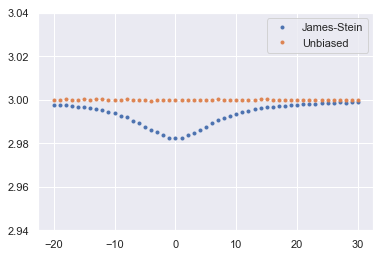

In [7]:
plt.plot(mu1,result_js.sum(axis=1),marker='.',linestyle='None',label='James-Stein')
plt.plot(mu1,result_ub.sum(axis=1),marker='.',linestyle='None',label='Unbiased')
plt.ylim(2.94,3.04)
plt.legend();

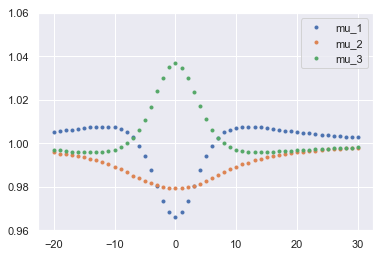

In [8]:
plt.plot(mu1,result_js[:,0],marker='.',linestyle='None',label='mu_1')
plt.plot(mu1,result_js[:,1],marker='.',linestyle='None',label='mu_2')
plt.plot(mu1,result_js[:,2],marker='.',linestyle='None',label='mu_3')
plt.ylim(0.96,1.06)
plt.legend();